<a href="https://colab.research.google.com/github/JoseDA0721/Ejercicio-Ebow/blob/main/Taller_Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ejercicio a Resolver: Análisis y Clustering de Datos del "New York City Airbnb Open Data"

**Objetivo:**
Realizar un análisis exhaustivo y clustering del dataset "New York City Airbnb Open Data" utilizando el Método del Codo basado en SSE/WCSS para determinar el número óptimo de clusters y realizar una interpretación avanzada de los resultados.

url = 'https://raw.githubusercontent.com/erkansirin78/datasets/master/AB_NYC_2019.csv'

En el desarrollo de este taller, el algoritmo K-means se utiliza para agrupar alojamientos de Airbnb en la ciudad de Nueva York en diferentes clusters basados en características específicas. El objetivo principal es identificar patrones y grupos de propiedades que tienen características similares.

El dataset "New York City Airbnb Open Data" proporciona información detallada sobre los listados de Airbnb en la ciudad de Nueva York. Este dataset incluye diversos atributos que describen los alojamientos, como precios, ubicaciones, número de reseñas, disponibilidad, y más. Es útil para análisis exploratorios, clustering, y otras tareas de ciencia de datos y aprendizaje automático.

**¿Qué se Intenta Agrupar?**

Se intenta agrupar los alojamientos de Airbnb en clusters según sus características cuantitativas.

**Propósito de Agrupar con K-means**
 * Descubrir patrones y características comunes entre diferentes grupos de alojamientos.
 * Identificar alojamientos con precios similares, disponibilidad y otros factores.
 * Segmentar el mercado de alojamientos en diferentes categorías (por ejemplo, alojamientos de lujo, económicos, con alta disponibilidad, etc.).
 * Ayudar a los anfitriones y potenciales clientes a comprender mejor las diferentes opciones disponibles.
 * Analizar la distribución geográfica de los clusters para entender cómo las características de los alojamientos varían según la ubicación.
 * Visualizar cómo los alojamientos con diferentes características están distribuidos por la ciudad.

**Características presentes en el dataset:**
 * id: Identificador único para cada listado.
 * name: Nombre del listado de Airbnb.
 * host_id: Identificador único del anfitrión.
 * host_name: Nombre del anfitrión.
 * neighbourhood_group: El grupo de vecindarios en Nueva York (e.g., Manhattan, Brooklyn).
 * neighbourhood: Vecindario específico donde se encuentra el listado.
 * latitude: Latitud de la ubicación del listado.
 * longitude: Longitud de la ubicación del listado.
 * room_type: Tipo de habitación ofrecida (e.g., Entire home/apt, Private room, Shared room).
 * price: Precio por noche en dólares.
 * minimum_nights: Número mínimo de noches requeridas para reservar.
 * number_of_reviews: Número de reseñas recibidas.
 * last_review: Fecha de la última reseña.
 * reviews_per_month: Número promedio de reseñas por mes.
 * calculated_host_listings_count: Número de listados calculados que tiene el anfitrión.
 * availability_365: Número de días disponibles en el año.

Pasos a Seguir:
 * Cargar el Dataset.
 * Cargar los datos en un DataFrame de Pandas.
 * Realizar un análisis exploratorio de los datos (EDA).
 * Verificar valores nulos, tipos de datos y estadísticas descriptivas.
 * Seleccionar características relevantes para el clustering (6 características).
 * Lidiar con los valores nulos (rellenar o eliminar).
 * Escalar las características usando el método de su preferencia (Debe presentar las comparaciones entre los métodos presentados).
 * Implementar el algoritmo K-means para un rango de valores de k.
 * Calcular la SSE/WCSS para cada valor de k.
 * Graficar la SSE/WCSS en función del número de clusters.
 * Identificar el número óptimo de clusters visualmente.
 * Utilizar el número óptimo de clusters identificado.
 * Ajustar el modelo K-means a los datos escalados.
 * Asignar cada punto de datos a un cluster.
 * Añadir la etiqueta del cluster al DataFrame original.
 * Calcular estadísticas descriptivas para cada cluster.
 * Visualizar los clusters utilizando gráficos de dispersión.
 * Realizar un análisis geográfico de los clusters, graficando las ubicaciones de los alojamientos en un mapa.
 * Visualizar noches (escalado) vs precio (escalado).
 * Etiquetar los clusters en función de las reseñas.
 * Añadir los resultados a un mapa.

# Librerias

In [1]:
# Se usa para escalar las características de los datos entre un rango específico, generalmente [0, 1].
from sklearn.preprocessing import StandardScaler
# Se utiliza para convertir etiquetas categóricas en valores numéricos.
from sklearn.preprocessing import LabelEncoder
# Se usa para evaluar la calidad de los clusters generados.
from sklearn.metrics import silhouette_score
# Algoritmo de clustering para agrupar datos en k clusters.
from sklearn.cluster import KMeans
# Biblioteca para crear visualizaciones de datos estáticas, animadas e interactivas.
import matplotlib.pyplot as plt
# Se usa para crear figuras y gráficos personalizados en Plotly.
import plotly.graph_objs as go
# Biblioteca de alto nivel que facilita la creación de gráficos interactivos.
import plotly.express as px
# Biblioteca para la visualización de datos faltantes en un DataFrame.
import missingno as msno
# Biblioteca para visualización de datos basada en matplotlib, que proporciona una interfaz de alto nivel.
import seaborn as sns
# Biblioteca para manipulación y análisis de datos, especialmente para estructuras de datos tabulares (DataFrames).
import pandas as pd
# Biblioteca para cálculos numéricos y manipulación de arrays.
import numpy as np
# Se usa para manejar advertencias generadas por el código.
import warnings


# Analisis de Datos

In [2]:
# Definir la URL del archivo CSV
url = 'https://raw.githubusercontent.com/erkansirin78/datasets/master/AB_NYC_2019.csv'
# Leer el archivo CSV desde la URL y almacenarlo en un DataFrame de pandas
df = pd.read_csv(url)
# Mostrar las primeras filas del DataFrame para inspeccionar los datos
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Mostrar un resumen conciso del DataFrame, incluyendo el número de entradas no nulas y el tipo de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# Eliminar las columnas 'id', 'name', 'host_id' y 'host_name' del DataFrame
df = df.drop(['id', 'name', 'host_id', 'host_name'], axis=1)

In [5]:
# Calcular estadísticas descriptivas para cada columna numérica y transponer el resultado para una mejor visualización
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,38843.0,1.373221,1.680442,0.01000,0.19000,0.72000,2.020000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


In [6]:
# Contar el número de valores nulos en cada columna del DataFrame
df.isnull().sum()


,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0
last_review,10052
reviews_per_month,10052


In [7]:
# Contar el número de entradas en la columna 'number_of_reviews' que tienen un valor de 0
(df['number_of_reviews'] == 0).sum()


10052

<Axes: >

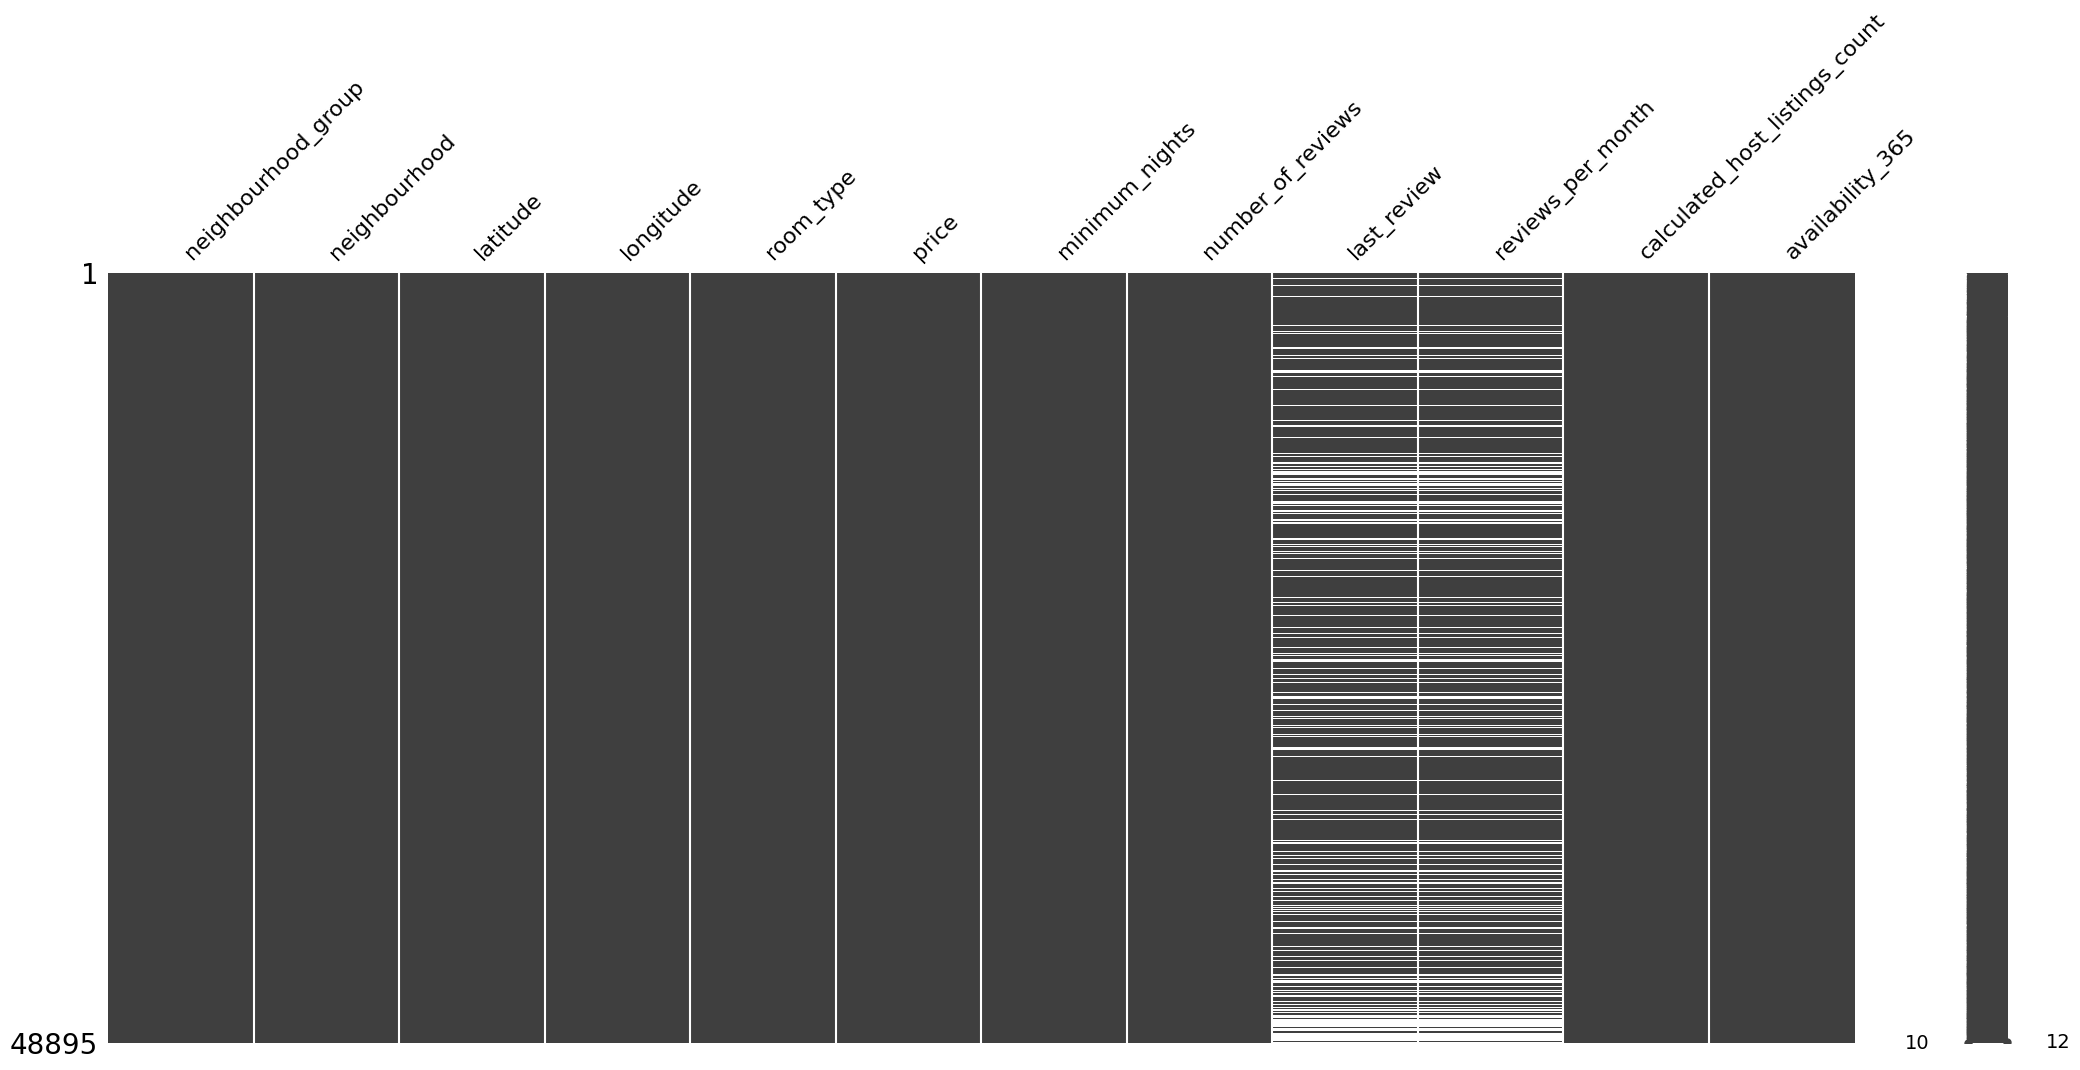

In [8]:
# Visualizar un gráfico de matriz que muestra los valores nulos en el DataFrame usando la biblioteca missingno
msno.matrix(df)

<Axes: >

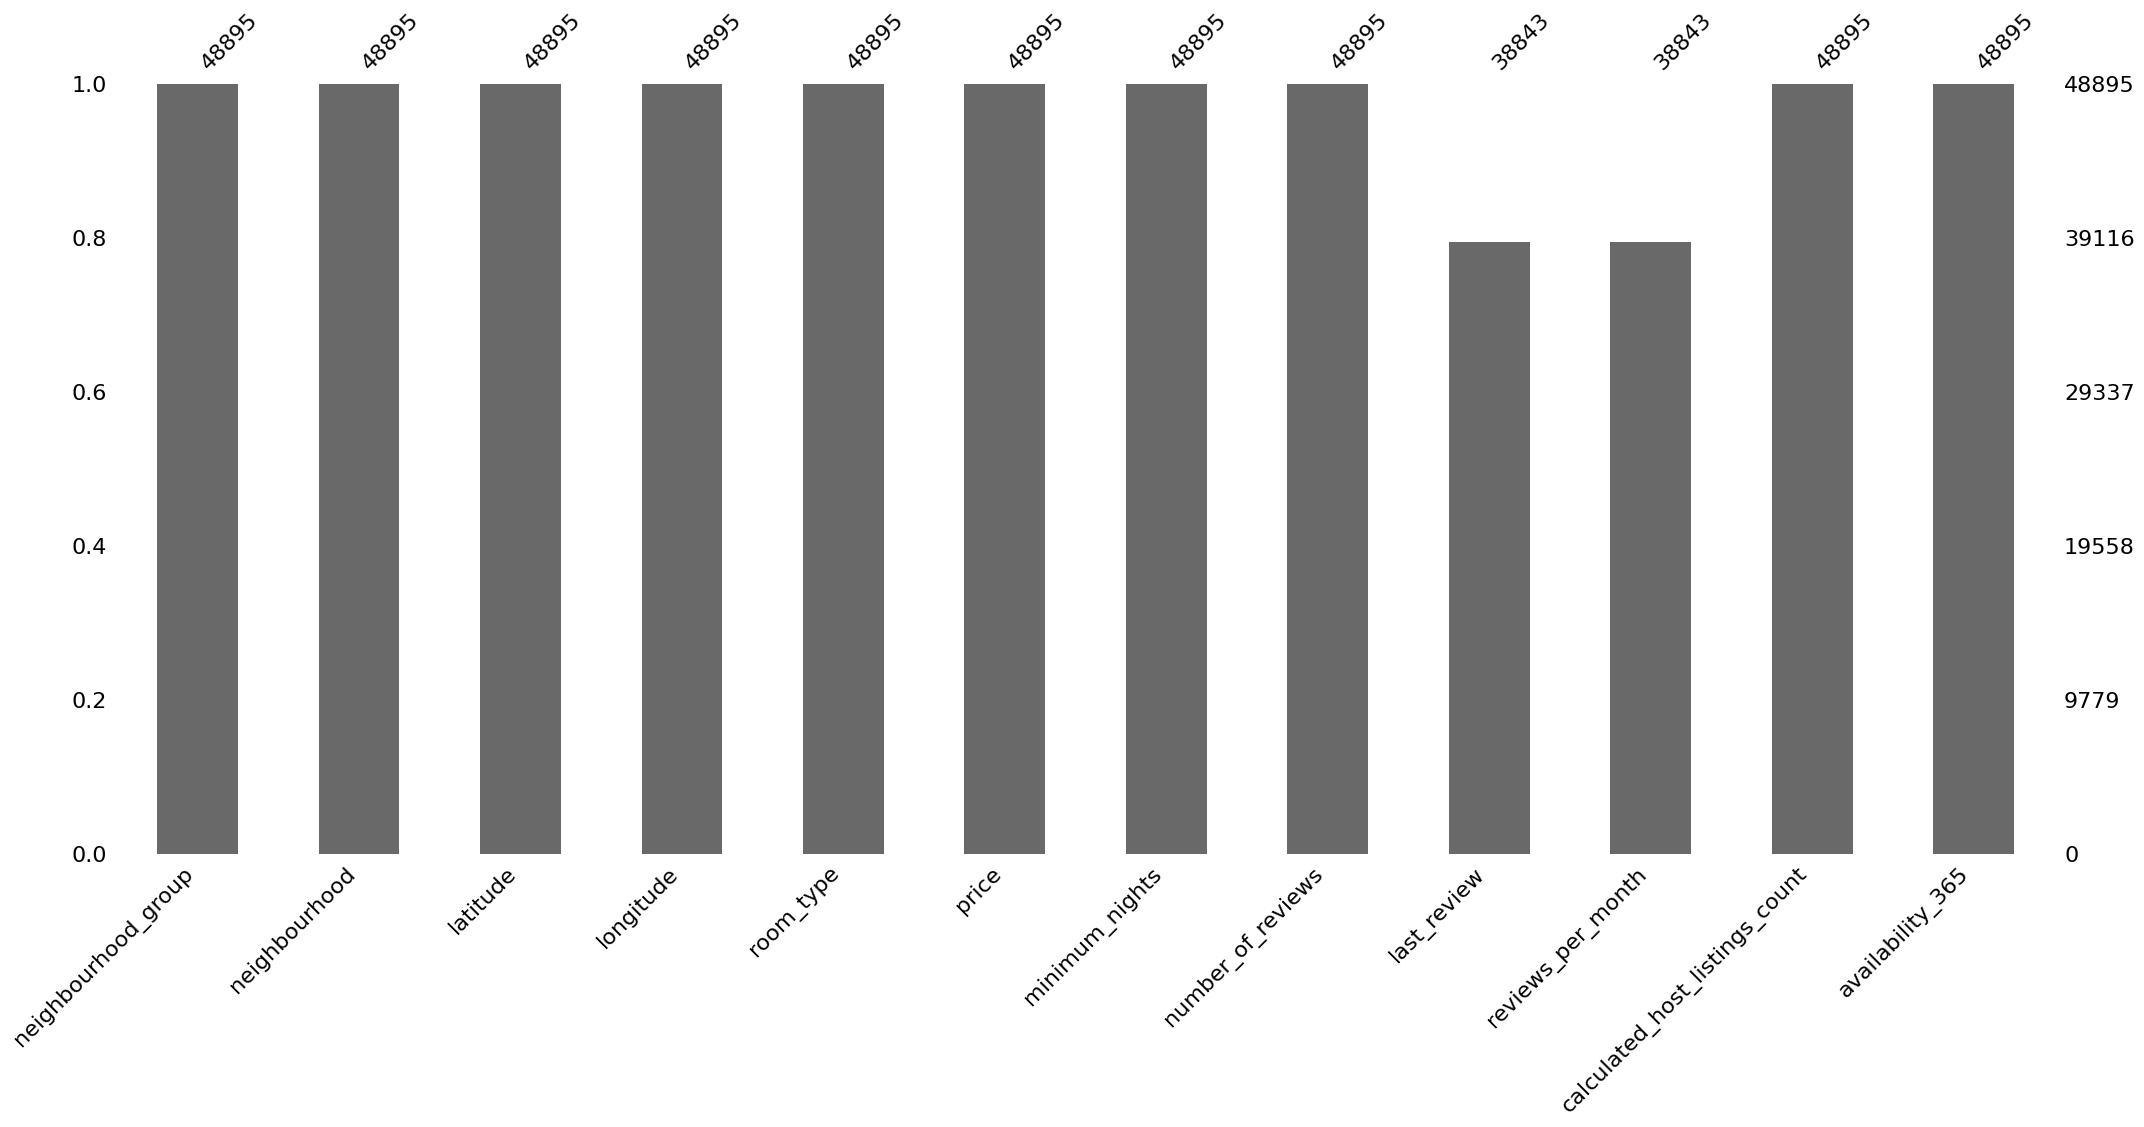

In [9]:
# Visualizar un gráfico de barras que muestra la cantidad de valores nulos en cada columna del DataFrame usando la biblioteca missingno
msno.bar(df)

In [10]:
# Rellenar los valores nulos en la columna 'reviews_per_month' con 0 y modificar el DataFrame en el lugar
df['reviews_per_month'].fillna(0, inplace=True)

<Axes: >

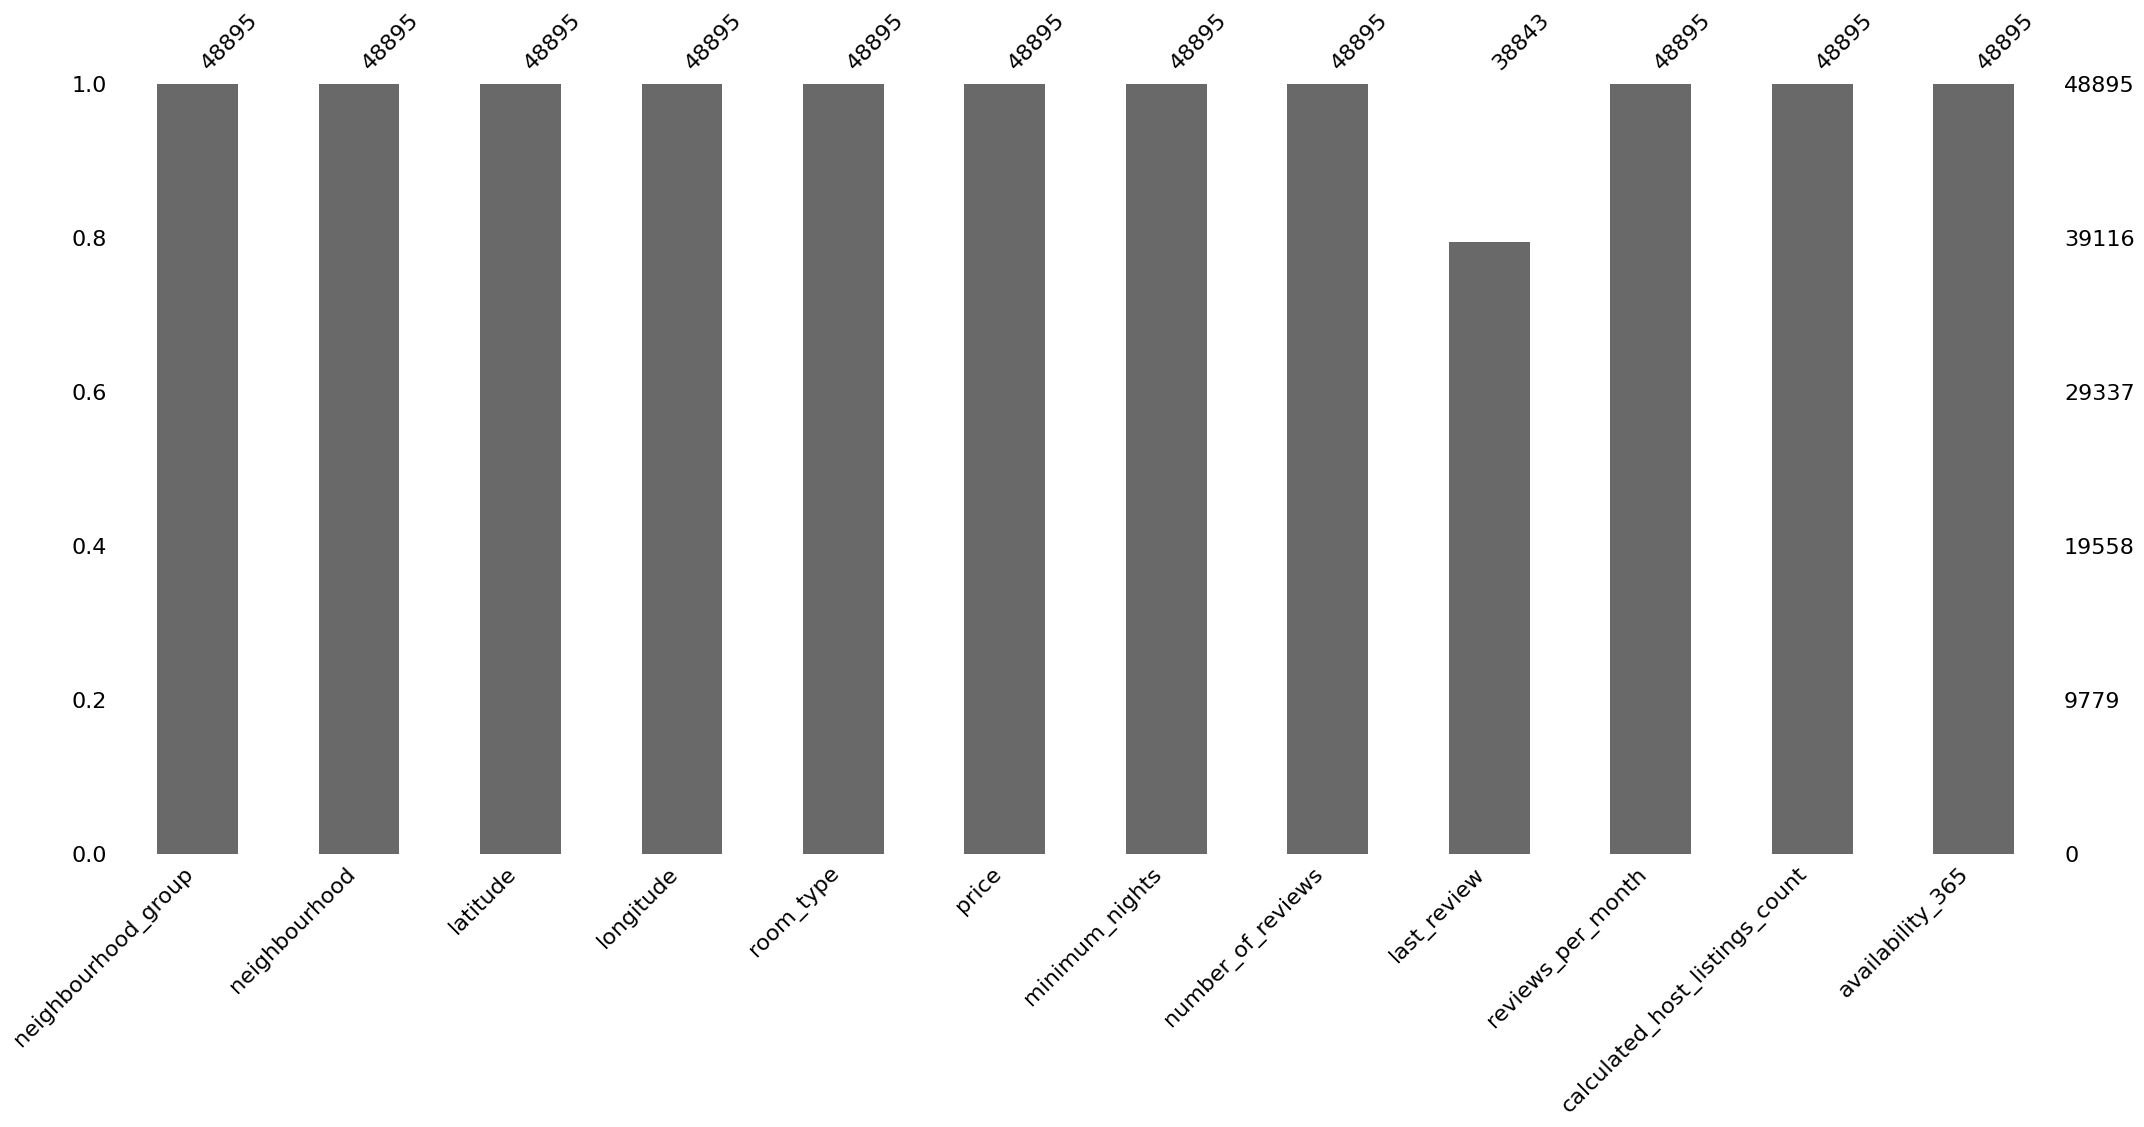

In [11]:
msno.bar(df)

In [12]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,48895.0,1.090910,1.597283,0.00000,0.04000,0.37000,1.580000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


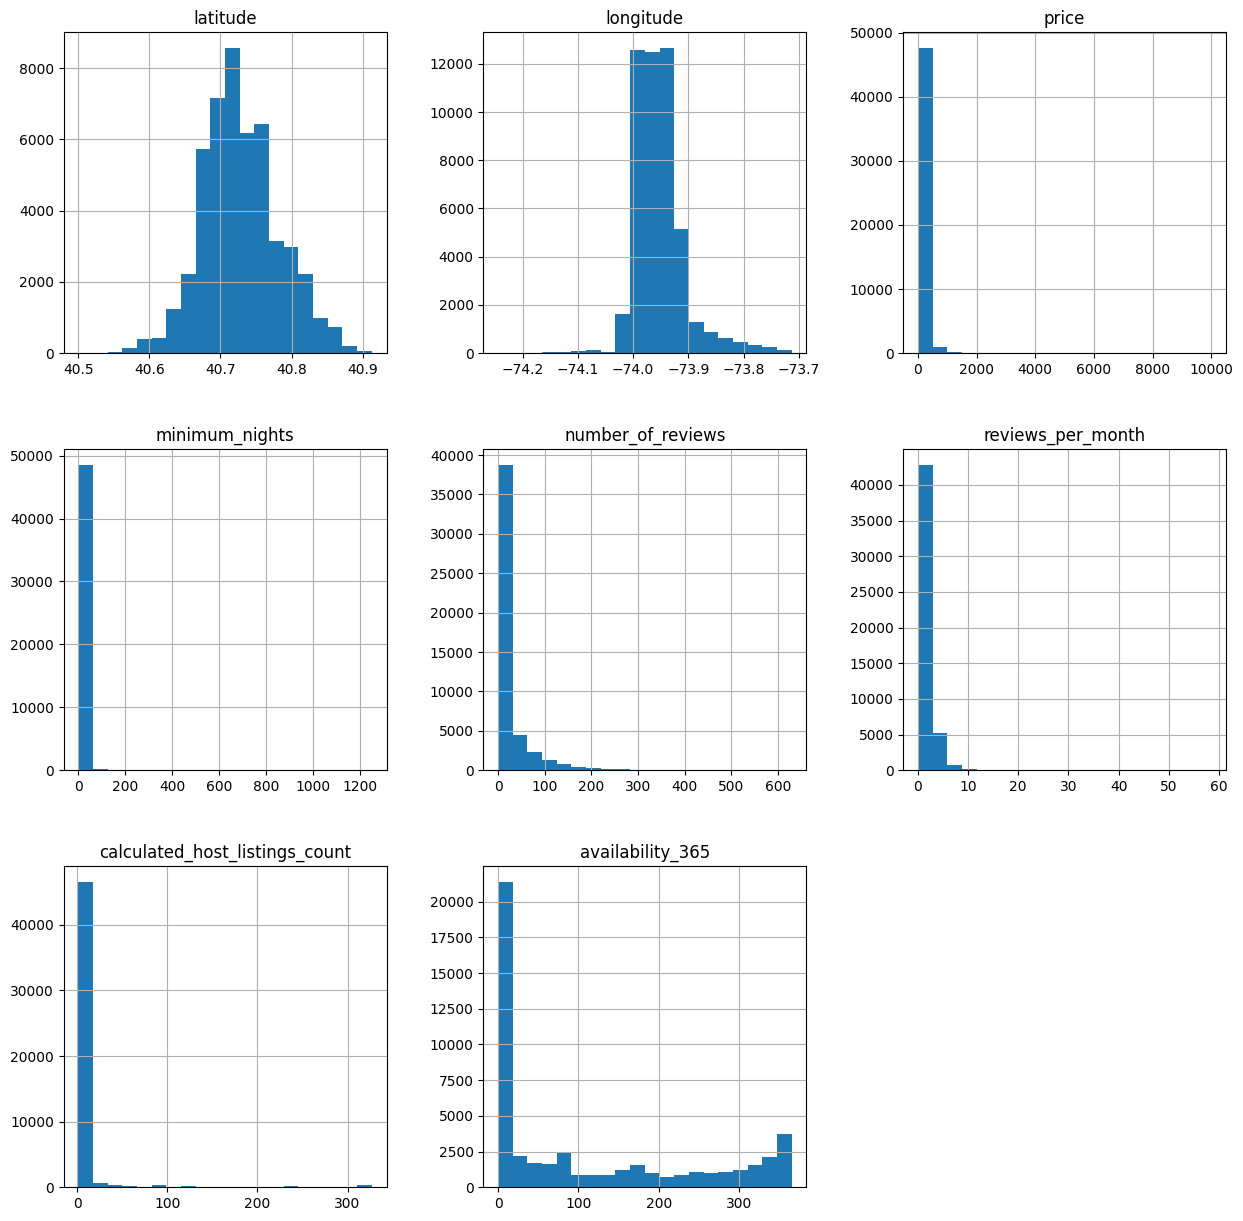

In [14]:
df.hist(figsize=(15, 15), bins=20)
plt.show()

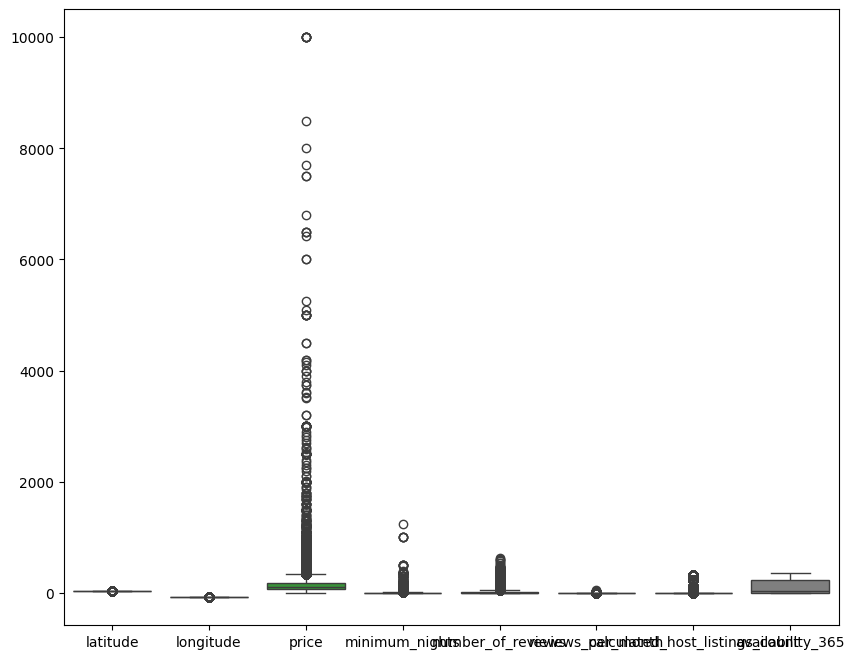

In [15]:
# Establecer el tamaño de la figura para el gráfico de caja (boxplot)
plt.figure(figsize=(10, 8))
# Crear un gráfico de caja para visualizar la distribución de los datos en el DataFrame
# Cada caja representa la distribución de una columna numérica en el DataFrame
sns.boxplot(data=df)
# Mostrar el gráfico de caja
plt.show()


In [16]:
# Crear una instancia del codificador de etiquetas
le = LabelEncoder()
# Iterar sobre todas las columnas del DataFrame
for col in df.columns:
    # Verificar si la columna es de tipo 'object' (categórica)
    if df[col].dtype == 'object':
        # Transformar las etiquetas de texto en valores numéricos usando el codificador de etiquetas
        df[col] = le.fit_transform(df[col])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  int64  
 1   neighbourhood                   48895 non-null  int64  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  int64  
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(9)
memory u

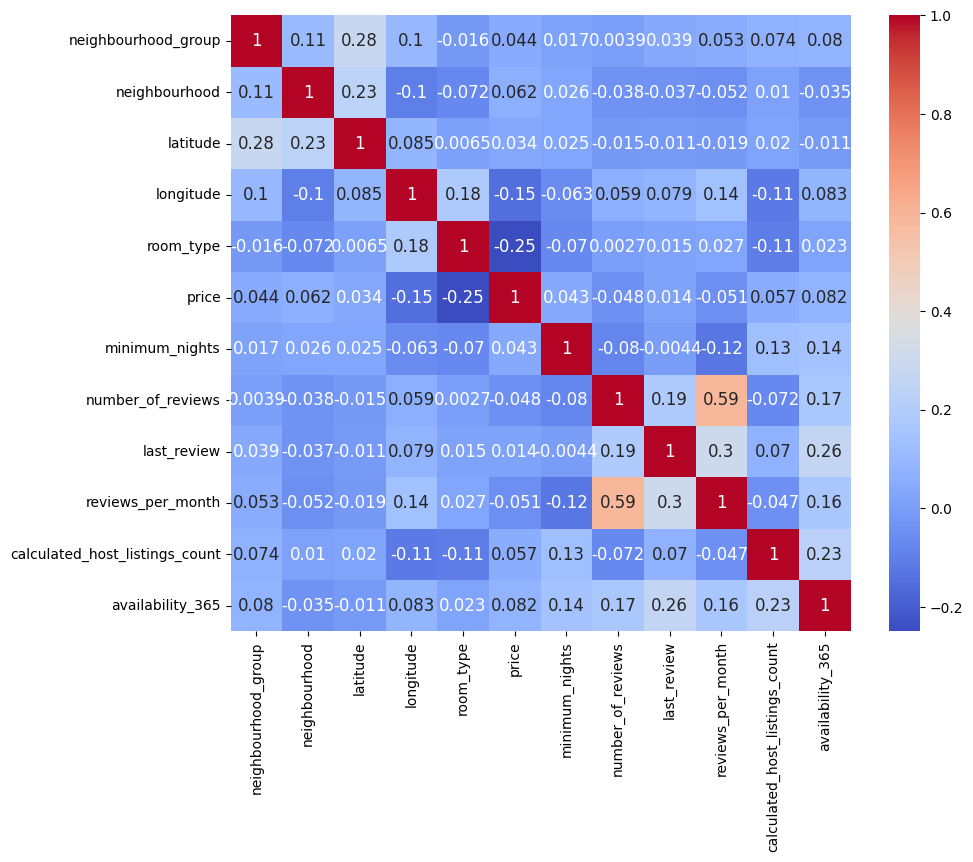

In [18]:
# Establecer el tamaño de la figura para el gráfico de calor
plt.figure(figsize=(10, 8))
# Crear un gráfico de calor para la matriz de correlación, con anotaciones y una paleta de colores 'coolwarm'
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', annot_kws={'size': 12})
# Mostrar el gráfico de calor
plt.show()


In [19]:
df_copia = df.copy()

In [20]:
# Seleccionar las características relevantes para el análisis o modelo y almacenarlas en una lista
caracteristicas = ['price', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
# Extraer las columnas especificadas en la lista 'caracteristicas' del DataFrame y almacenarlas en una nueva variable X
X = df[caracteristicas]
# Mostrar las primeras filas del DataFrame resultante con las características seleccionadas
X.head()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,1,9,0.21,6,365
1,225,1,45,0.38,2,355
2,150,3,0,0.00,1,365
3,89,1,270,4.64,1,194
4,80,10,9,0.10,1,0


In [21]:
# Crear una instancia del escalador MinMax para normalizar los datos entre 0 y 1
standard_scaler = StandardScaler()
# Ajustar el escalador a los datos de X y transformar X en los datos escalados
X_scaled = standard_scaler.fit_transform(X)

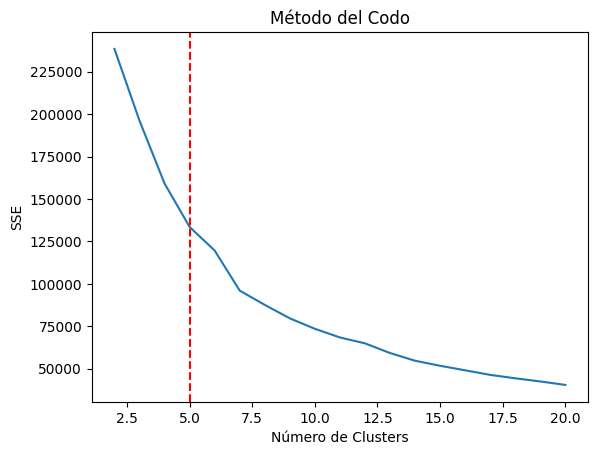

In [22]:
# Ignorar advertencias durante la ejecución del código
warnings.filterwarnings('ignore')
# Inicializar una lista para almacenar la suma de errores al cuadrado (SSE) para diferentes números de clusters
sse = []
# Iterar sobre un rango de números de clusters desde 2 hasta 20
for i in range(2, 21):
    # Crear una instancia de KMeans con el número actual de clusters
    kmeans = KMeans(n_clusters=i)
    # Ajustar el modelo KMeans a los datos escalados
    kmeans.fit(X_scaled)
    # Almacenar la suma de errores al cuadrado (SSE) para el modelo actual
    sse.append(kmeans.inertia_)
# Graficar la SSE en función del número de clusters
plt.plot(range(2, 21), sse)
# Etiquetar el eje x
plt.xlabel('Número de Clusters')
# Etiquetar el eje y
plt.ylabel('SSE')
# Establecer el título del gráfico
plt.title('Método del Codo')
# Añadir una línea vertical en el número óptimo de clusters (5) para visualizar el punto de codo
plt.axvline(x = 5, linestyle = '--', color = 'r', label = 'Número óptimo de clusters')
# Mostrar el gráfico
plt.show()

In [23]:
# Crear una instancia de KMeans con 5 clusters y una semilla aleatoria fija para reproducibilidad
kmeans = KMeans(n_clusters=5)
# Ajustar el modelo KMeans a los datos escalados
kmeans.fit(X_scaled)
# Asignar las etiquetas de los clusters generadas por el modelo a una nueva columna en el DataFrame
df['cluster'] = kmeans.labels_

In [24]:
# Calcular la media de las características seleccionadas para cada cluster y transponer el resultado para una mejor visualización
df.groupby('cluster')[caracteristicas].mean().transpose()

cluster,0,1,2,3,4
price,1835.259615,173.242199,273.928444,135.730639,126.017048
minimum_nights,191.201923,10.858990,21.150268,4.861743,2.505475
number_of_reviews,8.798077,14.184901,2.343470,8.531041,99.097159
reviews_per_month,0.274663,0.789166,0.722004,0.509939,3.952485
calculated_host_listings_count,3.326923,9.968638,287.572451,1.690649,2.073319
availability_365,209.576923,287.589338,281.703041,21.628250,151.870270


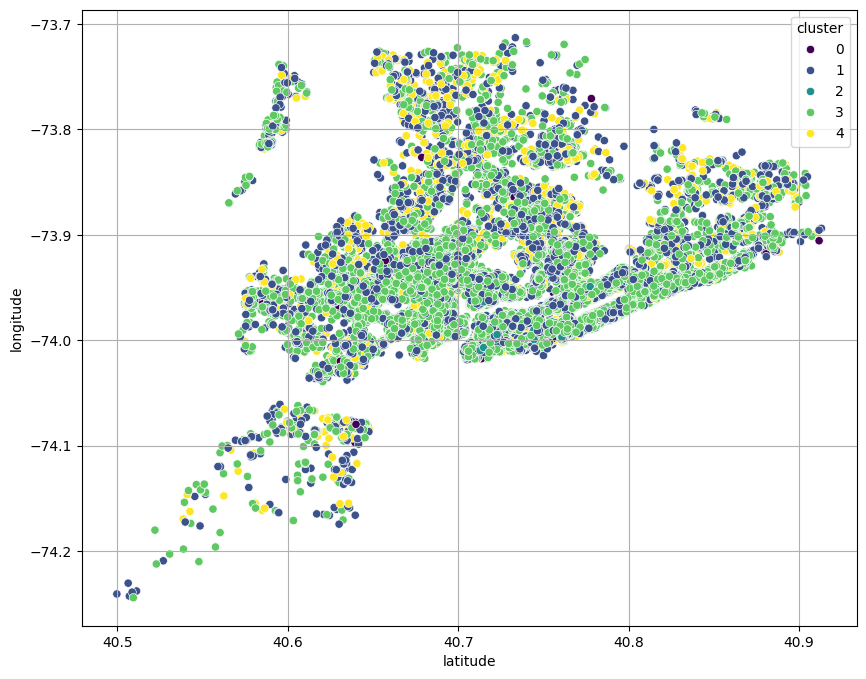

In [25]:
# Establecer el tamaño de la figura para el gráfico de dispersión
plt.figure(figsize=(10, 8))
# Crear un gráfico de dispersión de 'latitude' frente a 'longitude', coloreado por 'cluster' con la paleta de colores 'viridis'
sns.scatterplot(x='latitude', y='longitude', hue='cluster', data=df, palette='viridis')
# Habilitar la cuadrícula en el gráfico
plt.grid(True)
# Mostrar el gráfico
plt.show()

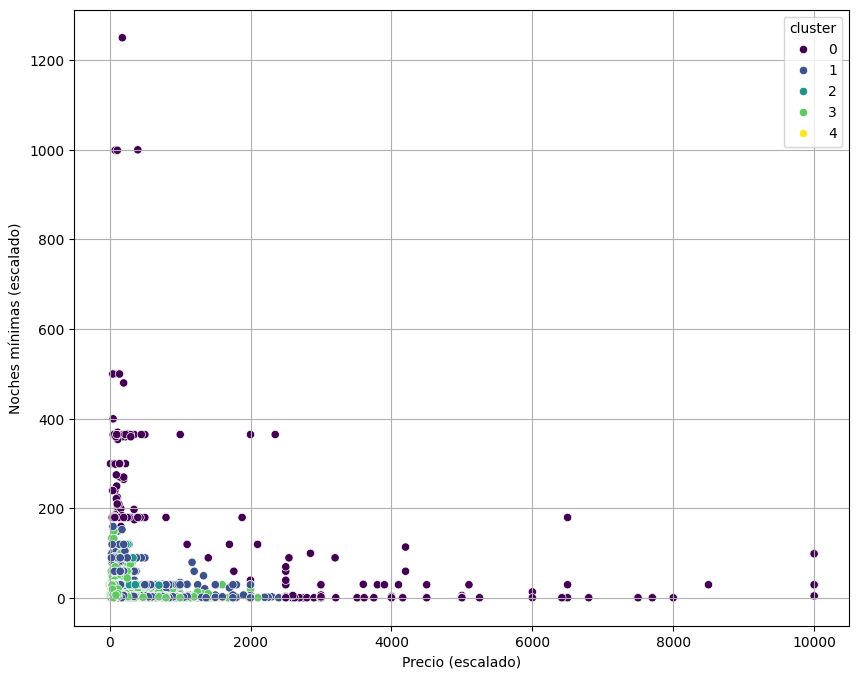

In [26]:
# Seleccionar las columnas 'minimum_nights' y 'price' del DataFrame y almacenarlas en una nueva variable X
x = df[['minimum_nights', 'price']]
# Crear una instancia del escalador MinMax para normalizar los datos entre 0 y 1
standard_scaler = StandardScaler()
# Ajustar el escalador a los datos de X y transformar X en los datos escalados
x = standard_scaler.fit_transform(x)
# Crear un DataFrame a partir de los datos escalados con nombres de columnas específicos
x = pd.DataFrame(X, columns=caracteristicas)
# Establecer el tamaño de la figura para el gráfico de dispersión
plt.figure(figsize=(10, 8))
# Crear un gráfico de dispersión de 'price' frente a 'minimum_nights', coloreado por 'cluster' con la paleta de colores 'viridis'
sns.scatterplot(x=x['price'], y=x['minimum_nights'], hue='cluster', data=df, palette='viridis')
# Establecer nombre del eje x
plt.xlabel('Precio (escalado)')
# Establecer nombre del eje y
plt.ylabel('Noches mínimas (escalado)')
# Habilitar la cuadrícula en el gráfico
plt.grid(True)
# Mostrar el gráfico
plt.show()


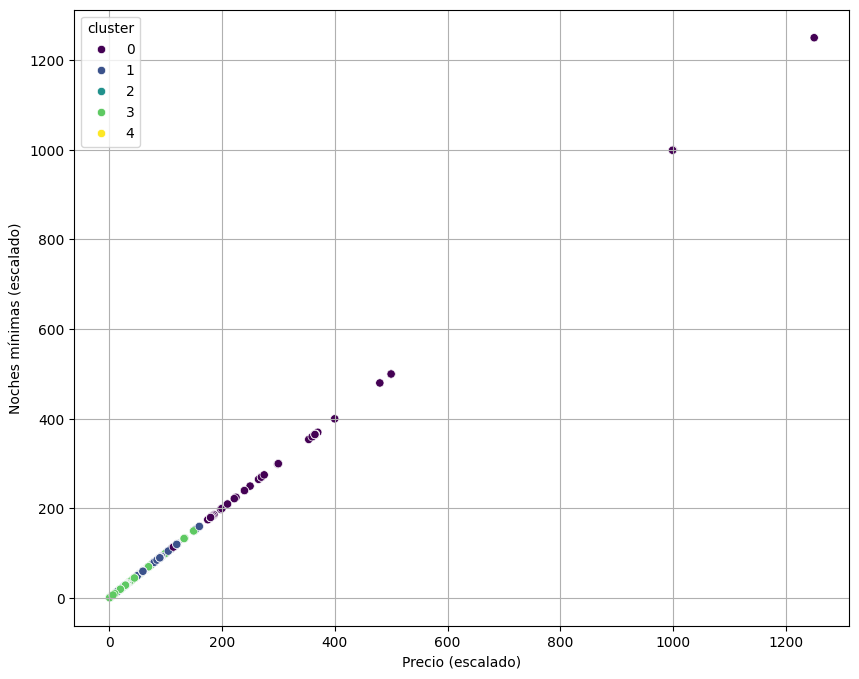

In [27]:
# Establecer el tamaño de la figura para el gráfico de dispersión
plt.figure(figsize=(10, 8))
# Crear un gráfico de dispersión de 'minimum_nights' frente a sí mismo (lo cual resultará en una línea diagonal), coloreado por 'cluster' con la paleta de colores 'viridis'
sns.scatterplot(x=x['minimum_nights'], y=x['minimum_nights'], hue='cluster', data=df, palette='viridis')
# Establecer nombre del eje x
plt.xlabel('Precio (escalado)')
# Establecer nombre del eje y
plt.ylabel('Noches mínimas (escalado)')
# Habilitar la cuadrícula en el gráfico
plt.grid(True)
# Mostrar el gráfico
plt.show()

In [28]:
# Calcular el promedio de reseñas por cluster
cluster_avg_reviews = df.groupby('cluster')['number_of_reviews'].mean()

# Definir un diccionario con las etiquetas basadas en los promedios
# Ejemplo simple: puedes ajustarlo según la distribución real de tus datos
cluster_labels = {
    0: 'Cluster 1: Reseñas altas',
    1: 'Cluster 2: Reseñas moderadas',
    2: 'Cluster 3: Reseñas bajas',
    3: 'Cluster 4: Nuevos listados',
    4: 'Cluster 5: Otros'  # Ajustar según las características específicas del cluster
}

# Asignar etiquetas al DataFrame
df['cluster_label'] = df['cluster'].map(cluster_labels)

# Verificar la distribución de etiquetas
print(df['cluster_label'].value_counts())

cluster_label
Cluster 4: Nuevos listados      28382
Cluster 2: Reseñas moderadas    12531
Cluster 5: Otros                 7215
Cluster 3: Reseñas altas          559
Cluster 1: Reseñas bajas          208
Name: count, dtype: int64


In [33]:
# Crear un mapa interactivo con puntos de dispersión usando 'cluster_label' para determinar el color
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color='cluster_label',
                        color_discrete_sequence=['blue','orange', 'purple', 'green','red'],
                        size_max=15, zoom=10,
                        mapbox_style="open-street-map")
# Actualizar el título de la leyenda
fig.update_layout(legend_title_text='Cluster Legends')
# Mostrar el mapa interactivo
fig.show()
